In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 폰트 설치

In [5]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,341 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
# fm._rebuild()
# fm.get_fontconfig_fonts()
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'#'/content/drive/MyDrive/Colab Notebooks/NanumGothic.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(path, size=10)#.get_name()
plt.rc('font', family='NanumGothic')
fm._rebuild()

In [2]:
print(font_name)

/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0


In [8]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf


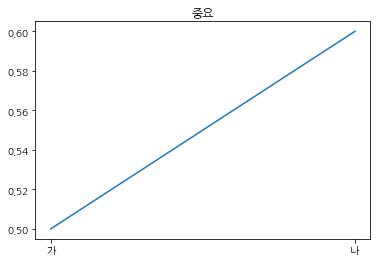

In [3]:
# 한글 폰트 설치가 잘 되었는지 확인하기 위한 그래프
plt.title('중요')
a = ['가', '나']
b = [0.5, 0.6]
plt.plot(a, b)
plt.show()

In [ ]:
!pip install gensim

# 필요한 라이브러리 및 데이터 로드

In [4]:
## load the libraries 
import pandas as pd
import numpy as np
import warnings
import os
import gensim
from gensim import summarization
from gensim.summarization import keywords
from gensim.summarization.keywords import get_graph
import networkx as nx
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
pd.set_option('display.max_columns', None)

In [ ]:
import os
os.getcwd()

'/content'

In [5]:
file_name = 'final_data_v2.csv'
file_path = os.getcwd()+'/drive/MyDrive/Colab Notebooks/'
df = pd.read_csv(file_path+file_name, encoding='utf-8')
df.rename(columns={'category_id_1':'category1'}, inplace=True)

In [6]:
df.head(3)

,imp_id,content_id,server_time_kst_x,imp_hour,bid_price_x,click_label,user_gender,user_age_group,user_age,user_following_cnt,user_pay_count,user_parcel_post_count,user_transfer_count,user_chat_count,name,keyword,price,flag_used,category1,emergency_cnt,comment_cnt,ad_interest,ad_pfavcnt,adver_favorite_count,adver_grade,adver_item_count,adver_interest,adver_review_count,adver_comment_count,adver_pay_count,adver_parcel_post_count,adver_transfer_count,adver_chat_count,m_time,content_img_url
0,9919612e44382421285c,162261579,2021-09-01 00:01:42.466000+09:00,0,55,0,F,1,16,3,0,0,0,2,Z플립 5G 256GB [그레이] 48082 (S급),"Z플립5G,제트플립,제트플립5G,갤럭시Z플립5G,Z플립5G그레이",580000.0,1.0,600,0.0,0.0,120.0,4.0,2063.0,7539.0,784.0,3424.0,755.0,392.0,677.0,0.0,5.0,236.0,1629443915,https://media.bunjang.co.kr/product/162261579_...
1,9919612e444924217d59,145430389,2021-09-01 00:01:42.466000+09:00,0,70,0,F,2,26,0,0,0,0,0,최저가60 무선청소기 기펠상위모델 국내브랜드 셀프스텐드 정품무배,"기펠청소기,무선청소기,코드제로,에어슬림",135000.0,2.0,600,0.0,3.0,5385.0,153.0,799.0,5520.0,433.0,16794.0,570.0,250.0,942.0,0.0,57.0,11.0,1629943339,https://media.bunjang.co.kr/product/145430389_...
2,97f9612e444d18489e0e,98827336,2021-09-01 00:01:40.339000+09:00,0,50,0,F,5,53,0,0,0,0,0,정품 원터치텐트 낚시텐트 자외선차단텐트 방수텐트 캠핑텐트 간편 자동텐트,"원터치텐트간편텐트,낚시텐트등산텐트,자외선차단방수텐트,자동텐트감성캠핑,캠핑용품그늘막",26000.0,2.0,700,0.0,12.0,29950.0,759.0,2120.0,3252.0,2053.0,32794.0,351.0,441.0,166.0,0.0,16.0,3.0,1627289231,https://media.bunjang.co.kr/product/98827336_1...


In [7]:
text_df = df[['name', 'keyword', 'category1']]
text_df.head(3)

,name,keyword,category1
0,Z플립 5G 256GB [그레이] 48082 (S급),"Z플립5G,제트플립,제트플립5G,갤럭시Z플립5G,Z플립5G그레이",600
1,최저가60 무선청소기 기펠상위모델 국내브랜드 셀프스텐드 정품무배,"기펠청소기,무선청소기,코드제로,에어슬림",600
2,정품 원터치텐트 낚시텐트 자외선차단텐트 방수텐트 캠핑텐트 간편 자동텐트,"원터치텐트간편텐트,낚시텐트등산텐트,자외선차단방수텐트,자동텐트감성캠핑,캠핑용품그늘막",700


In [ ]:
text_df.isnull().sum()

name          70241
keyword      134724
category1         0
dtype: int64

In [8]:
text_df.dropna(subset = ['name', 'keyword'], axis=0, inplace=True)

In [ ]:
text_df.isnull().sum()

name         0
keyword      0
category1    0
dtype: int64

# 데이터 전처리 - 정규표현식

In [63]:
# 한글, 영어, 숫자만 남기고 기타 특수문자들을 제거. 
import re

def text_cleaning(doc):
  text = re.sub('[^가-힣0-9ㄱ-ㅣa-zA-Z]', ' ', string = doc)
  return text

clean_name = [nm for nm in text_df['name']]
clean_kw = [kw for kw in text_df['keyword']]

In [64]:
clean_name[:10]

['Z플립 5G  256GB  [그레이]  48082  (S급)',
 '최저가60 무선청소기 기펠상위모델 국내브랜드 셀프스텐드 정품무배',
 '정품 원터치텐트 낚시텐트 자외선차단텐트 방수텐트 캠핑텐트 간편 자동텐트',
 '#당일발송#갤럭시노트20 256G 대량판매 등급별초특가!',
 '#한정판매#갤럭시노트20 S급 레드 256G 중고폰공기계[10537]',
 '노트10  [아우라글로우]  44758  (A급)',
 '[가격인하]집에서 피씨방처럼 즐기자! 컴퓨터/데스크탑/게이밍풀셋/배그',
 '#당일발송# 아이폰7 32G/128G 대량판매 등급별초특가!',
 '#당일발송#아이폰8 64G/256G 대량판매 등급별초특가!',
 '(무료배송)1인용 , 2인용 호텔식이불 세트']

In [65]:
clean_kw[:10]

['Z플립5G,제트플립,제트플립5G,갤럭시Z플립5G,Z플립5G그레이',
 '기펠청소기,무선청소기,코드제로,에어슬림',
 '원터치텐트간편텐트,낚시텐트등산텐트,자외선차단방수텐트,자동텐트감성캠핑,캠핑용품그늘막',
 '노트20중고폰,노트20공기계폰,Note20,갤럭시노트20중고',
 '갤럭시노트20,노트20중고,노트20중고폰,노트20공기계,직거래',
 '노트10,갤럭시노트10,노트10아우라,노트10글로우,NOTE10',
 '컴퓨터,본체,배그,롤,데스크탑',
 '아이폰7,아이폰7중고폰,아이폰7공기계,아이폰7중고',
 '아이폰8중고폰,아이폰8중고공기계,아이폰8중고,아이폰8',
 '호텔식이불,이불,간절기이불,겨울이불,사계절이불']

In [66]:
name_txt = str(clean_name)[1:-1]
kw_txt = str(clean_kw)[1:-1]

In [67]:
clean_kw = text_cleaning(kw_txt)
clean_nm = text_cleaning(name_txt)

# 키워드 추출하고 그래프 그리기

In [ ]:
#  gensim 라이브러리에서 제공하는 text rank 방식의 키워드 추출 함수로 실습해봅시다. 
from gensim.summarization import keywords

# 5개의 키워드 추출 
print(keywords(clean_kw, words=5).split('\n'))
print(keywords(clean_nm, words=5).split('\n'))

# 상위 10% 키워드 추출
print(keywords(clean_kw, ratio=0.1).split('\n'))
print(keywords(clean_nm, ratio=0.1).split('\n'))

['아이폰', '갤럭시s', '갤럭시', '컴퓨터', 'z플립', '루이비통']
['미개봉', 'ss급', '아이폰', '한정판매', '새제품']
['아이폰', '갤럭시s', '갤럭시', '컴퓨터', 'z플립', '루이비통', '갤럭시노트', '아이폰se', '버버리', '중고폰', '원피스', '스타벅스', '게이밍컴퓨터', '애슐리상점', '노트북', '배틀그라운드배그', '아이폰xr', '몽클레어', '버버리코트', '중고차', 'rtx', '아이폰x', '그래픽카드 vga', '트레이닝', '다이어트', '프라다', '발렌시아가', '여성골프채', '금목걸이', '도금팔찌', '빈티지', '아이폰xs 아이폰xsmax', '직거래', 'mini', '가디건', '배틀그라운드', '금반지', '엑스맥스', '남녀공용', 'z폴드', '갤럭시z플립', '버즈프로', '명품가방', 'note', '신세계상품권', '리니지방송용gtx', '게이밍', '냥희네컴퓨터', '모니터 게이밍모니터', '명품매입', '게임용컴퓨터', '아이패드프로', '프로맥스', '울트라중고', '에어프라이어', '롱원피스', '기프티콘', '화이트', '버버리원패널', '애플워치', '애플워치se', '모하비', '여성골프채풀세트', '컴퓨터세트', '드라이어', '프로맥스중고폰', '버즈플러스', '기가골프', 'pro중고폰', '중고갤럭시노트', '중고노트', '플리츠집업', '포르자', '도금목걸이', '분리기통', '랭스필드', '갤럭시a', '조거팬츠', 'lg벨벳', '인덕션', 'iphone', 'iphon', '중국도자기', '에어팟', '전기그릴', '골동품 도자기', '레이디디올', '트렌치코트', '기펠청소기 무선청소기', 'pcx머플러', '럭키슈에뜨', '미즈노', '만다리나덕', '알피쿨', '사무용컴퓨터', '마크앤로나', '자동차', '컬쳐랜드', '알레르망', '중고갤럭시s', '블루투스', '컴퓨터본체', '남자카고바지', '숏자켓', '임판휠', '인

In [55]:
# 키워드 추출에 사용딘 텍스트 그래프를 확인해봅시다. 
def displayGraph(textGraph):
    graph = nx.Graph()
    for edge in textGraph.edges():
        graph.add_node(edge[0])
        graph.add_node(edge[1])
        graph.add_weighted_edges_from([(edge[0], edge[1], textGraph.edge_weight(edge))])

        textGraph.edge_weight(edge)
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(20, 20))
    nx.draw(graph, pos, edge_color='gray', width=0.8, linewidths=1.2,
            node_size=600, node_color='lightblue', alpha=0.7,
            labels={node: node for node in graph.nodes()}, font_family='NanumGothic',font_size=10)
    plt.axis('off')
    # plt.rc('font', family='NanumGothic')
    plt.show()

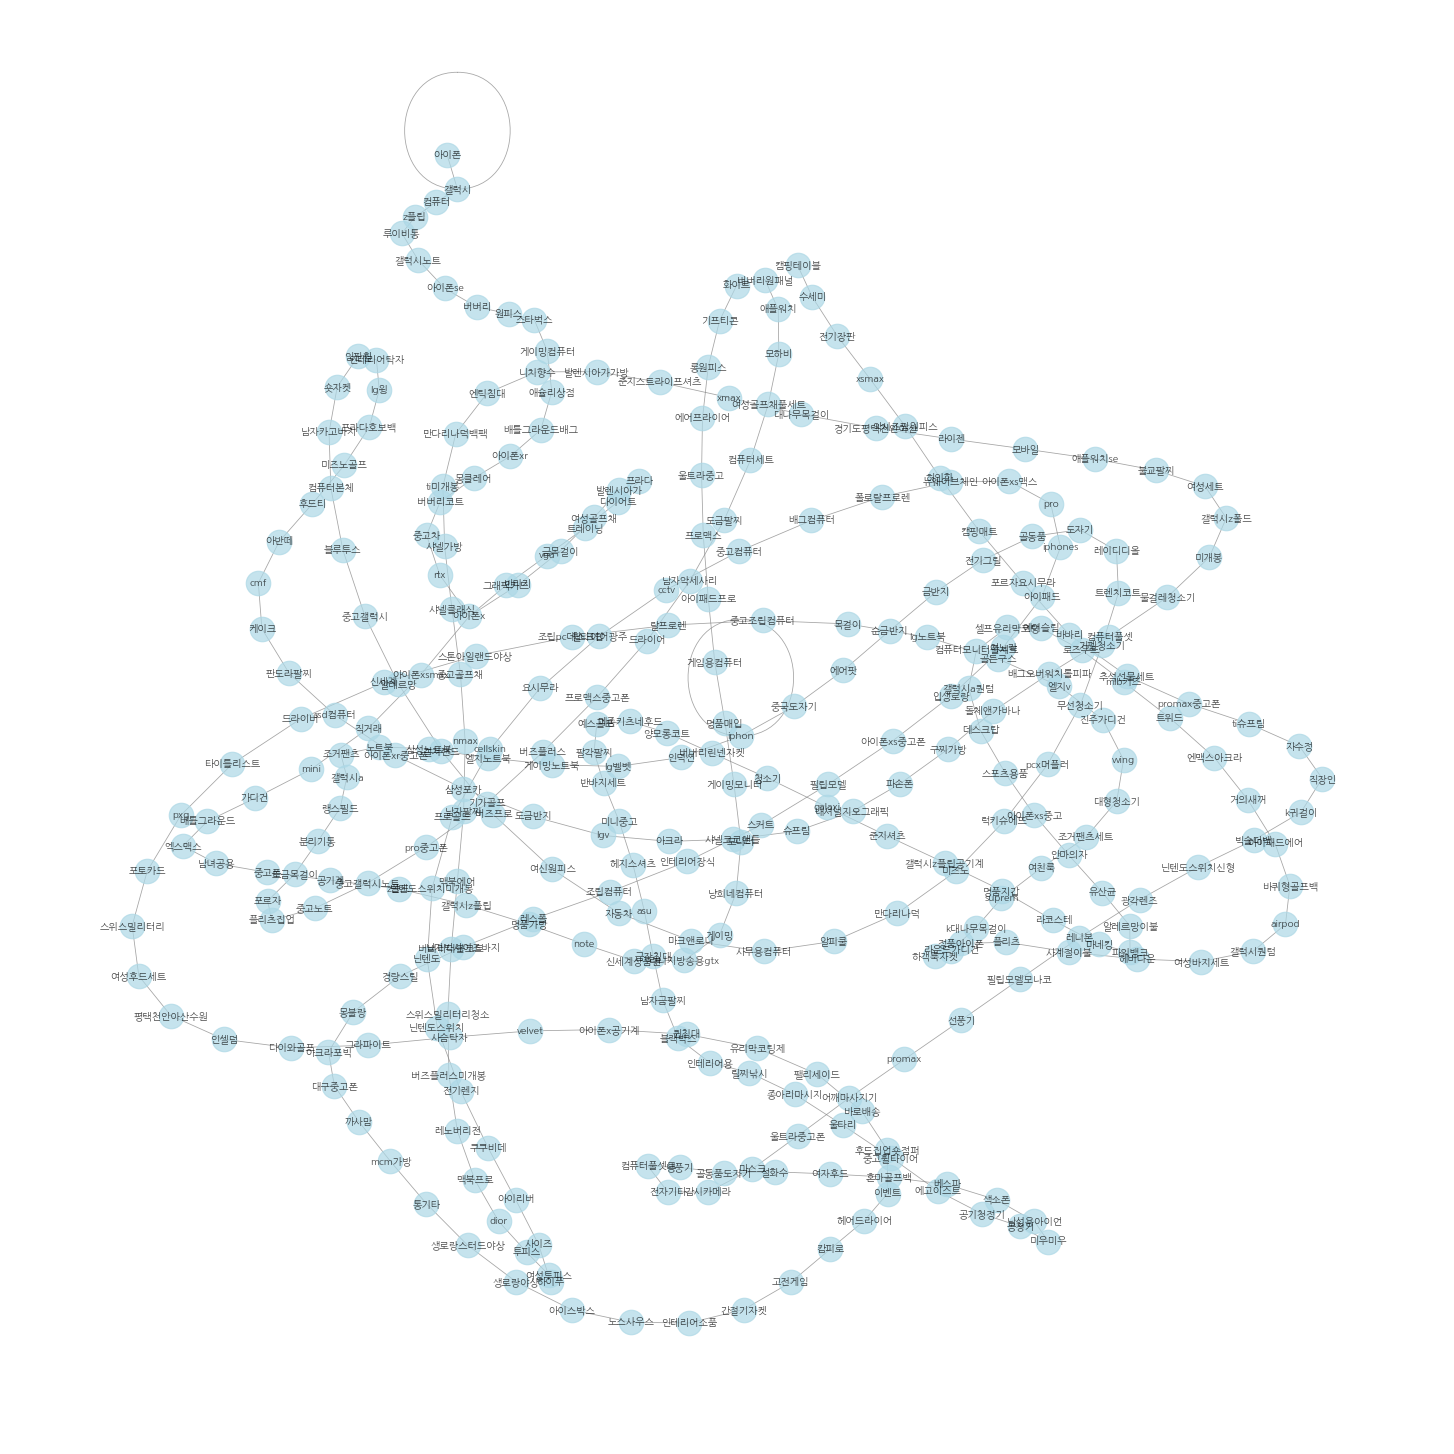

In [68]:
kw_text = keywords(clean_kw)
displayGraph(get_graph(kw_text))

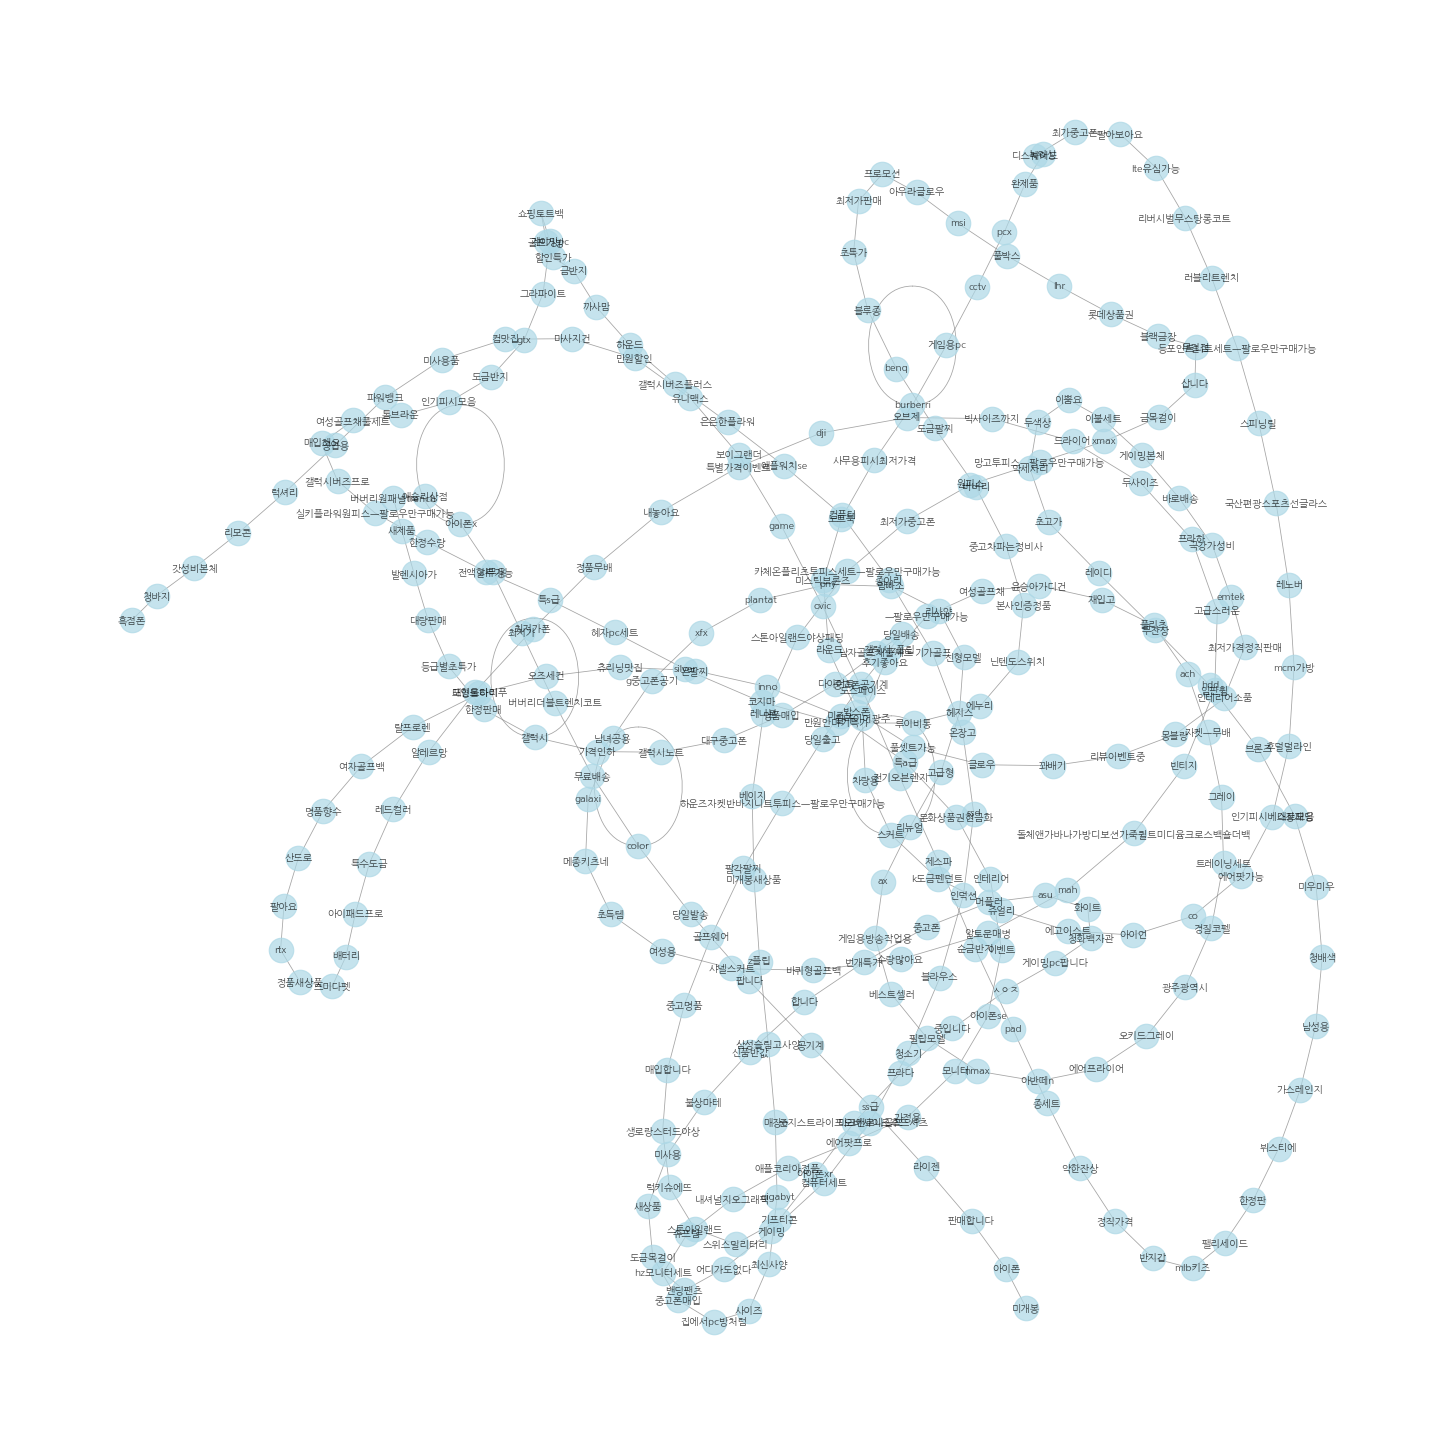

In [69]:
nm_text = keywords(clean_nm)
displayGraph(get_graph(nm_text))

In [14]:
# 2개의 키워드와 각 단어의 중요도 
two_kw_nm = [keywords(txt, words=2, scores=True) for txt in clean_name] 

In [15]:
revised_kw_nm = []
for i in two_kw_nm:
  if len(i) == 0:
    pass
  else:
    revised_kw_nm.append(i)

In [16]:
revised_kw_nm[:10]

[[('무선청소기', 0.4746744668493732), ('셀프스텐드', 0.47467446684937303)],
 [('방수텐트', 0.5312606010873799), ('낚시텐트', 0.5312606010873793)],
 [('당일발송', 0.5000000000000004)],
 [('한정판매', 0.7071067811865475)],
 [('아이폰', 0.5000000000000002), ('당일발송', 0.5000000000000001)],
 [('대량판매', 0.5000000000000001), ('등급별초특가', 0.5000000000000001)],
 [('호텔식이불', 0.422953886480781)],
 [('발렌시아가', 0.8013863112267422)],
 [('등급별초특가', 0.4336913706626999)],
 [('배달자전거', 0.4746744668493733)]]

In [25]:
two_kw = [keywords(txt, words=1, scores=True) for txt in clean_kw] 

In [26]:
revised_kw = []
for i in two_kw:
  if len(i) == 0:
    pass
  else:
    revised_kw.append(i)

In [27]:
revised_kw[:10]

[[('아이폰', 0.8466487815452375)],
 [('아이폰', 0.8013863112267428)],
 [('바운스', 0.8466487815452377)],
 [('프로맥스중고폰', 0.7071067811865475)],
 [('갤럭시s', 0.7071067811865475)],
 [('제트플립', 0.8466487815452377)],
 [('아이폰', 0.8013863112267426)],
 [('아이폰', 0.8056815791722831)],
 [('아이폰', 0.8013863112267424)],
 [('바운스', 0.8466487815452378)]]

In [28]:
dict_kw = {'high_imp':[],
           'high_imp_kw':[]}
for i in revised_kw_nm:
  if len(i) == 1:
    dict_kw['high_imp'].append(i)
  elif len(i) >= 2:
    l = [i[n][1] for n in range(len(i))]
    l2 = [i[n][0] for n in range(len(i))]
    dict_kw['high_imp'].append([(l2[l.index(np.max(l))], l[l.index(np.max(l))])])

for i in revised_kw:
  if len(i) == 1:
    dict_kw['high_imp_kw'].append(i)
  elif len(i) >= 2:
    l = [i[n][1] for n in range(len(i))]
    l2 = [i[n][0] for n in range(len(i))]
    dict_kw['high_imp_kw'].append([(l2[l.index(np.max(l))], l[l.index(np.max(l))])])

In [29]:
dict_kw['high_imp_kw'][:10]

[[('아이폰', 0.8466487815452375)],
 [('아이폰', 0.8013863112267428)],
 [('바운스', 0.8466487815452377)],
 [('프로맥스중고폰', 0.7071067811865475)],
 [('갤럭시s', 0.7071067811865475)],
 [('제트플립', 0.8466487815452377)],
 [('아이폰', 0.8013863112267426)],
 [('아이폰', 0.8056815791722831)],
 [('아이폰', 0.8013863112267424)],
 [('바운스', 0.8466487815452378)]]

In [30]:
dict_kw['high_imp'][:10]

[[('무선청소기', 0.4746744668493732)],
 [('방수텐트', 0.5312606010873799)],
 [('당일발송', 0.5000000000000004)],
 [('한정판매', 0.7071067811865475)],
 [('아이폰', 0.5000000000000002)],
 [('대량판매', 0.5000000000000001)],
 [('호텔식이불', 0.422953886480781)],
 [('발렌시아가', 0.8013863112267422)],
 [('등급별초특가', 0.4336913706626999)],
 [('배달자전거', 0.4746744668493733)]]

In [111]:
imp = [i[0][1] for i in dict_kw['high_imp_kw']]
word = [i[0][0] for i in dict_kw['high_imp_kw']]

df = pd.DataFrame(word, columns = ['word'])
df['importance_rate'] = imp
df = df.drop_duplicates(subset=df.columns)
df = df.sort_values(by='importance_rate', ascending=False)
# df = pd.concat([df, text_df['category1']], axis=1)
df

,word,importance_rate
2947,아이폰se,1.0
2191,갤럭시,1.0
34,갤럭시노트,1.0
26,아이폰,1.0
80,아이폰xr,1.0
...,...,...
31946,모하비,0.5
14643,캄피로,0.5
20979,갤럭시s,0.5
9270,노트북,0.5


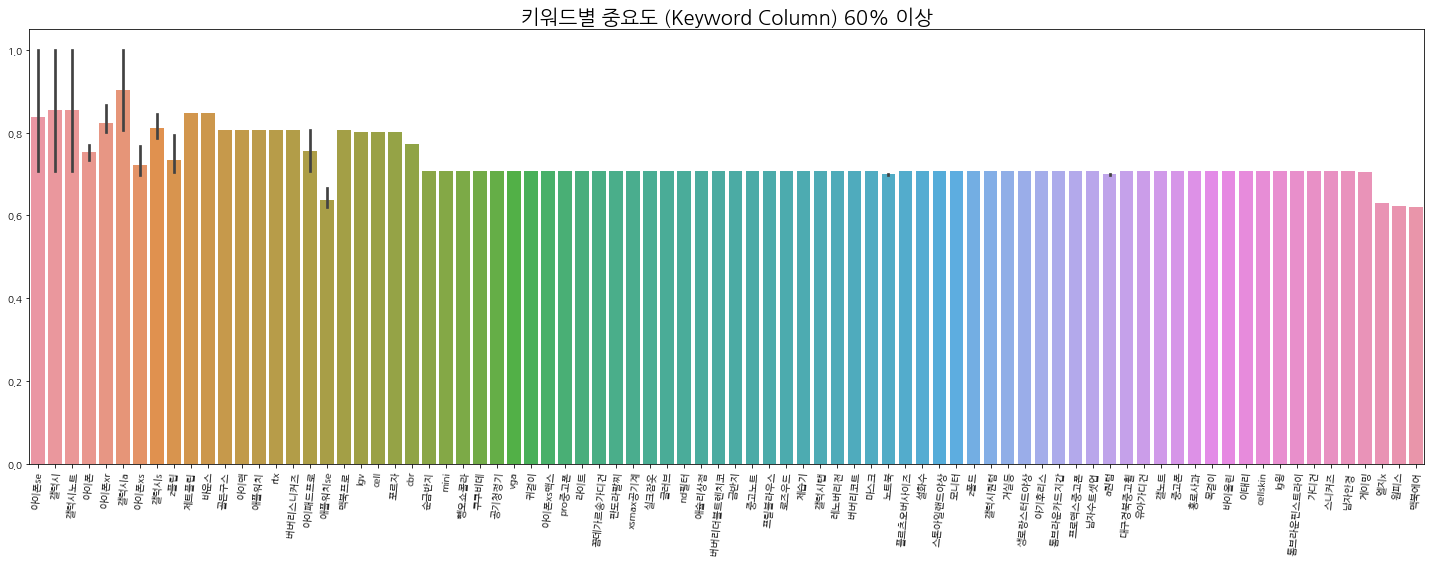

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rc('font', family='Nanum Gothic')
kw_df = df[df['importance_rate']>=0.60000]
plt.figure(figsize=(25, 8))
plt.title('키워드별 중요도 (Keyword Column) 60% 이상', fontsize = 20)
sns.barplot(data=kw_df, x= 'word', y='importance_rate')
plt.xticks(rotation = 85)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [93]:
imp = [i[0][1] for i in dict_kw['high_imp']]
word = [i[0][0] for i in dict_kw['high_imp']]

df1 = pd.DataFrame(word, columns = ['name'])
df1['importance_rate'] = imp
df1 = df1.drop_duplicates(subset=['name'])
df1 = df1.sort_values(by='importance_rate', ascending=False)
# df = pd.concat([df, text_df['category1']], axis=1)
df1

,name,importance_rate
546,오락기,0.847564
14981,매빅미니,0.801386
11801,woc,0.801386
1190,lg전자,0.801386
108,싸게팝니다,0.801386
...,...,...
164395,epic,0.408248
165916,pny,0.408248
75,롤부터,0.405054
784,가성비사양,0.405054


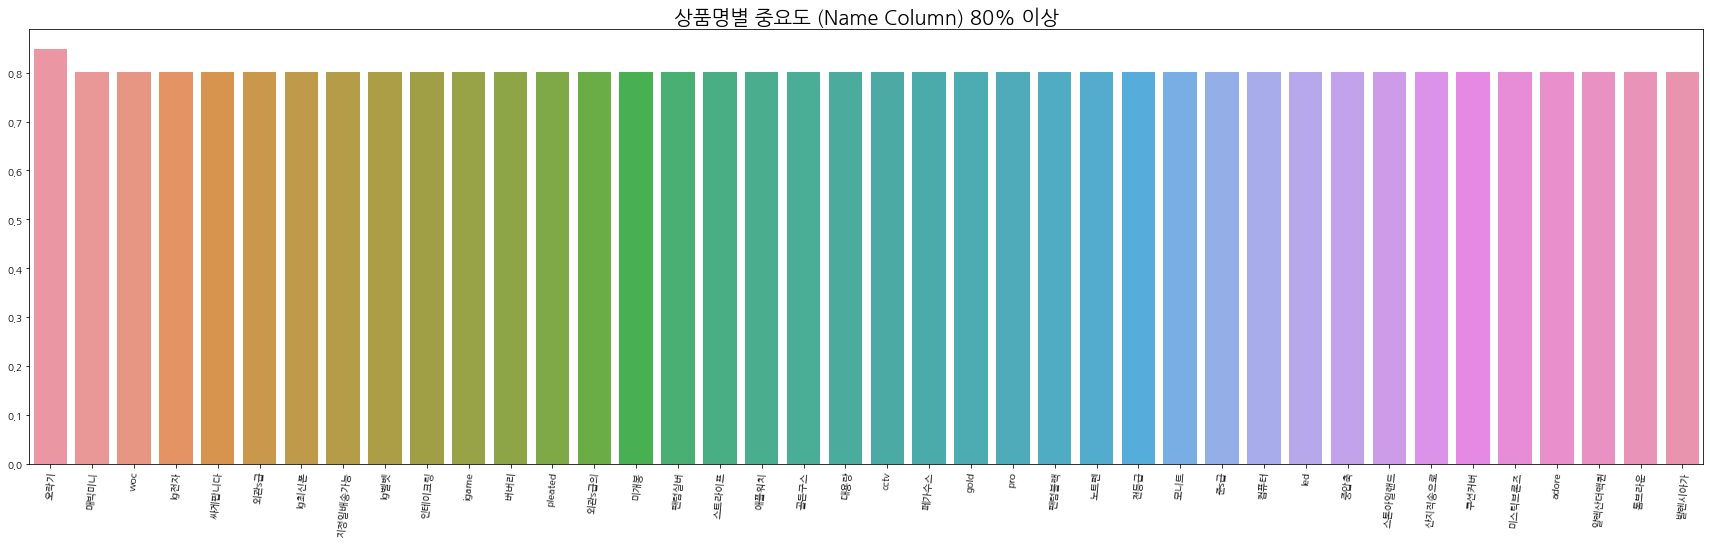

In [106]:
imp_df = df1[df1['importance_rate']>=0.750000]
plt.figure(figsize=(30, 8))
plt.title('상품명별 중요도 (Name Column) 80% 이상', fontsize = 20)
sns.barplot(data=imp_df, x= 'name', y='importance_rate')
plt.xticks(rotation = 85)
plt.xlabel(None)
plt.ylabel(None)
plt.show()